In [24]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import  f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import pickle
import joblib
import m2cgen as m2c

print("Đã load toàn bộ thư viện")

Đã load toàn bộ thư viện


In [25]:
df = pd.read_csv('Data/kidney_disease.csv')
print("Đã load được tệp!")


Đã load được tệp!


In [26]:
#Thay thế các giá trị "?" bằng giá trị null
df.replace("?", np.nan, inplace=True)

#Loại bỏ các dòng chứa giá trị null
df.dropna(inplace=True)

# Loại bỏ cột "id" không cần thiết
df.drop(['id'], axis=1, inplace=True)


In [27]:
# Chuyển các giá trị object sang kiểu số
df['rbc'] = df['rbc'].map({'normal': 1, 'abnormal': 0})
df['pc'] = df['pc'].map({'normal': 1, 'abnormal': 0})
df['pcc'] = df['pcc'].map({'present': 1, 'notpresent': 0})
df['ba'] = df['ba'].map({'present': 1, 'notpresent': 0})
df['htn'] = df['htn'].map({'yes': 1, 'no': 0})
df['dm'] = df['dm'].map({'yes': 1, 'no': 0, '': 0})
df['cad'] = df['cad'].map({'yes': 1, 'no': 0})
df['appet'] = df['appet'].map({'good': 1, 'poor': 0})
df['pe'] = df['pe'].map({'yes': 1, 'no': 0})
df['ane'] = df['ane'].map({'yes': 1, 'no': 0})

In [28]:
x_data = df.drop(['classification'], axis=1).values

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['classification'])

# Normalize feature data using Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(x_data)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.9791666666666666
Precision: 0.9722222222222222


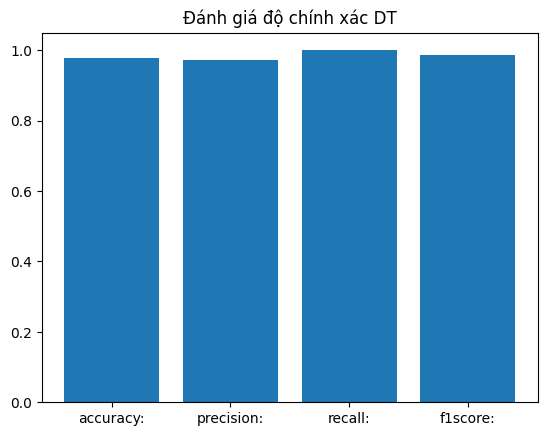

In [40]:
y_pred = model.predict(X_test)

accuracy=accuracy_score (y_test, y_pred)
precision=precision_score (y_test, y_pred)
recall=recall_score (y_test, y_pred, average="binary")
f1score=f1_score (y_test, y_pred, average="binary")


evaluation = {
    "accuracy:" :accuracy,
    "precision:" :precision,
    "recall:": recall,
    "f1score:": f1score
}
fig, ax = plt.subplots()
ax.bar(evaluation.keys(), evaluation.values())
ax.set(title="Đánh giá độ chính xác DT")

print('Accuracy:', accuracy)
print('Precision:', precision)

In [41]:
import numpy as np
#không
# Load the model
model = pickle.load(open('Data/LR_Model.h5', 'rb'))
new_data = np.array([[48.0, 80.0, 1.02, 1.0, 0.0, 1, 1, 0, 0, 121.0, 36.0, 1.2,0,0, 15.4, 44, 7800, 5.2, 1, 1, 0, 1, 0, 0]])

prediction = model.predict(new_data)

if prediction == 0:
    print("Khách hàng không bị bệnh thận.")
else:
    print("Khách hàng bị bệnh thận.")

Khách hàng bị bệnh thận.


In [38]:
import numpy as np
import pickle
#bị
# Load the model
model = pickle.load(open('Data/LR_Model.h5', 'rb'))

new_data = np.array([[47.0, 80, 1.025, 0, 0, 1, 1, 0, 0, 124, 44, 1, 140, 4.9, 14.9, 41, 7000, 5.7, 1, 1, 0, 1, 0, 0]])

# Perform the prediction
prediction = model.predict(new_data)

# Display the prediction result
if prediction == 0:
    print("Khách hàng không bị bệnh thận.")
else:
    print("Khách hàng bị bệnh thận.")

Khách hàng không bị bệnh thận.


In [ ]:
filename = 'Data/DT_Model.h5'
pickle.dump(model, open(filename, 'wb'))